<a href="https://colab.research.google.com/github/JesusOsama/Diabetes-Prediction/blob/main/Diabetes_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías


In [ ]:
from google.colab import drive
import pandas as pd

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss
from scipy.stats import chi2_contingency
from sklearn.preprocessing import LabelEncoder

In [ ]:
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="scipy.stats")

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import recall_score

# Exploración y Preprocesamiento de Datos

## Lectura de Datos

  Datos: https://www.kaggle.com/datasets/iammustafatz/diabetes-prediction-dataset

In [ ]:
data= pd.read_csv('diabetes_prediction_dataset.csv')
data.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0.0,1.0,never,25.19,6.6,140.0,0.0
1,Female,54.0,0.0,0.0,No Info,27.32,6.6,80.0,0.0
2,Male,28.0,0.0,0.0,never,27.32,5.7,158.0,0.0
3,Female,36.0,0.0,0.0,current,23.45,5.0,155.0,0.0
4,Male,76.0,1.0,1.0,current,20.14,4.8,155.0,0.0


In [ ]:
data.dtypes

gender                  object
age                    float64
hypertension           float64
heart_disease          float64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level    float64
diabetes               float64
dtype: object

## Tratamiento de Datos

### Eliminación de Datos Duplicados y Nulos

In [ ]:
# Duplicados
duplicates = data[data.duplicated()]
print("Duplicados: ", duplicates.shape)

Duplicados:  (1251, 9)


In [ ]:
data = data.drop_duplicates()

In [ ]:
# Nulos
data.isnull().sum()

gender                 0
age                    0
hypertension           1
heart_disease          1
smoking_history        1
bmi                    1
HbA1c_level            1
blood_glucose_level    1
diabetes               1
dtype: int64

In [ ]:
data = data.dropna()

### Datos únicos y Eliminación de categorías

In [ ]:
for columna in data.columns:
    cantidad_unicos = len(data[columna].unique())
    print(f"{columna}: {cantidad_unicos} valores")

gender: 3 valores
age: 102 valores
hypertension: 2 valores
heart_disease: 2 valores
smoking_history: 6 valores
bmi: 3868 valores
HbA1c_level: 18 valores
blood_glucose_level: 18 valores
diabetes: 2 valores


In [ ]:
# Gender
data['gender'].unique()

array(['Female', 'Male', 'Other'], dtype=object)

In [ ]:
data = data[data['gender'] != 'Other'] # Eliminamos Other

In [ ]:
# Smoking_history
data['smoking_history'].unique()

array(['never', 'No Info', 'current', 'former', 'ever', 'not current'],
      dtype=object)

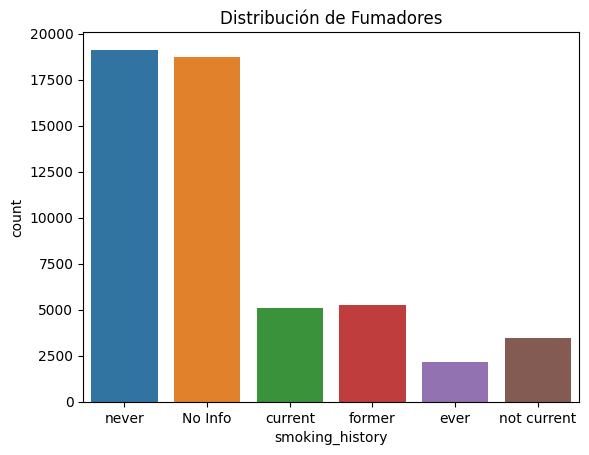

In [ ]:
sns.countplot(x='smoking_history', data=data)
plt.title('Distribución de Fumadores')
plt.show()

In [ ]:
def recategorize_smoking(smoking_status):
    if smoking_status in ['never', 'No Info']:
        return 'non-smoker'
    elif smoking_status == 'current':
        return 'current'
    elif smoking_status in ['ever', 'former', 'not current']:
        return 'past_smoker'

data['smoking_history'] = data['smoking_history'].apply(recategorize_smoking)

print(data['smoking_history'].value_counts())

non-smoker     37841
past_smoker    10866
current         5077
Name: smoking_history, dtype: int64


### Exploración mediante gráficas

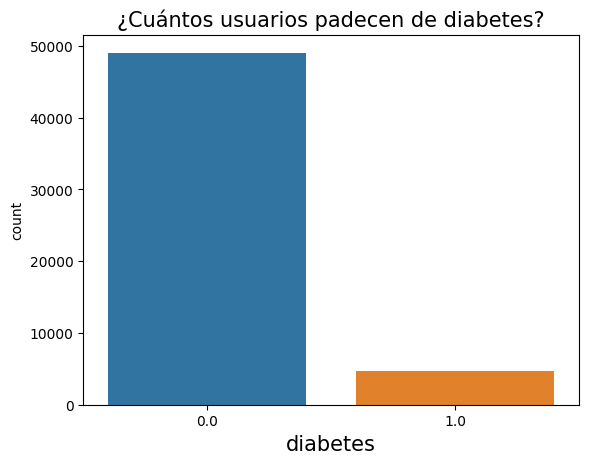

In [ ]:
sns.countplot(data = data, x = 'diabetes')
plt.xlabel('diabetes', fontsize = 15)
plt.title('¿Cuántos usuarios padecen de diabetes?', fontsize = 15)
plt.show()

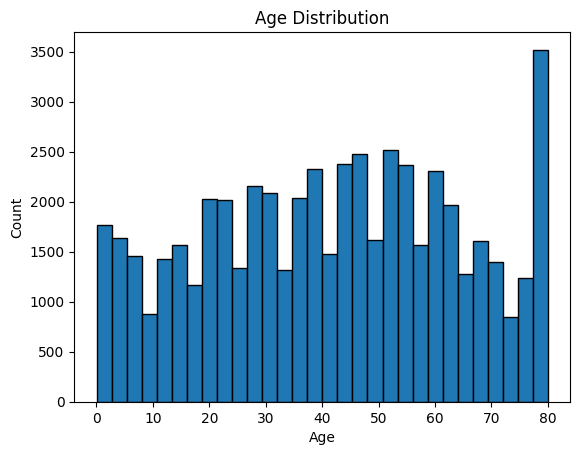

In [ ]:
plt.hist(data['age'], bins=30, edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

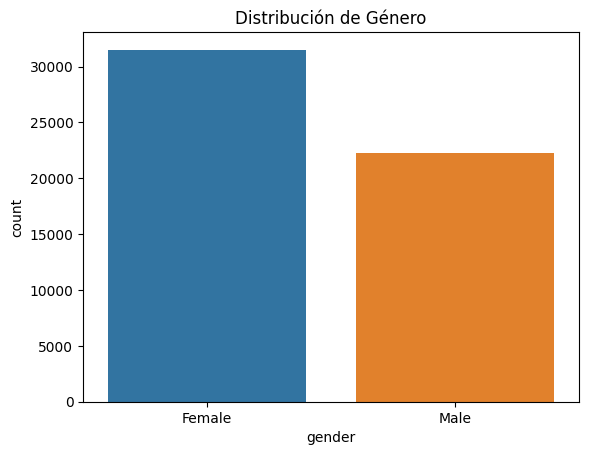

In [ ]:
sns.countplot(x='gender', data=data)
plt.title('Distribución de Género')
plt.show()

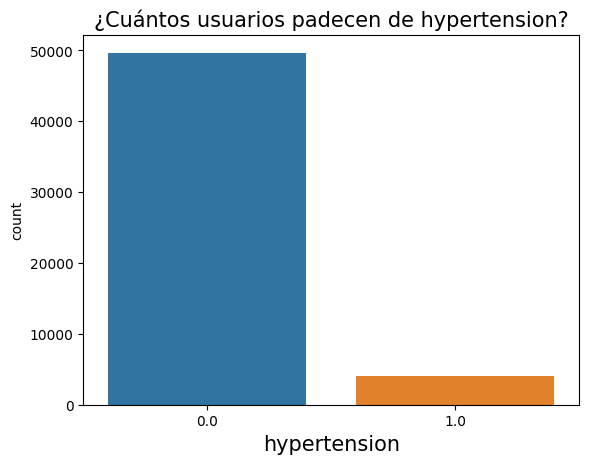

In [ ]:
sns.countplot(data = data, x = 'hypertension')
plt.xlabel('hypertension', fontsize = 15)
plt.title('¿Cuántos usuarios padecen de hypertension?', fontsize = 15)
plt.show()

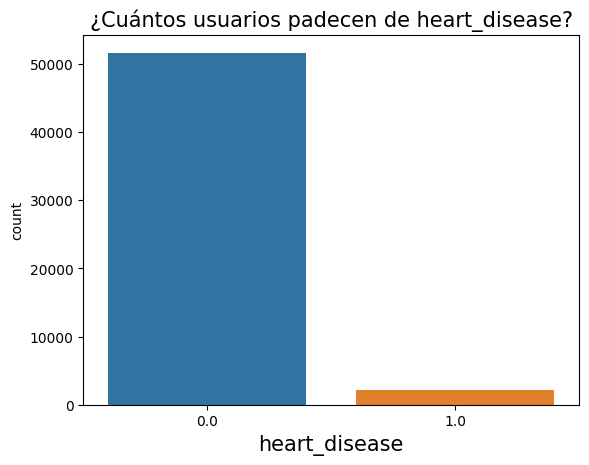

In [ ]:
sns.countplot(data = data, x = 'heart_disease')
plt.xlabel('heart_disease', fontsize = 15)
plt.title('¿Cuántos usuarios padecen de heart_disease?', fontsize = 15)
plt.show()

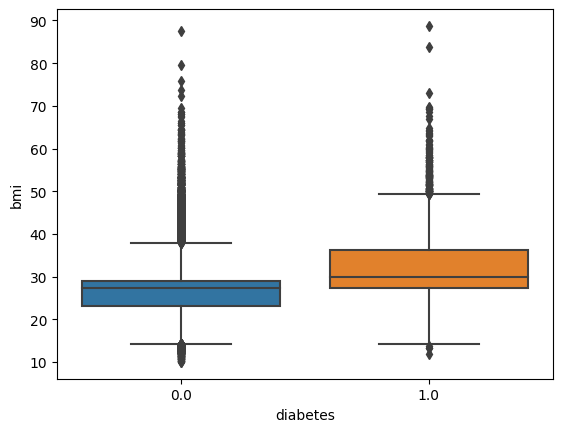

In [ ]:
sns.boxplot(x='diabetes',y='bmi',data=data)
plt.show()

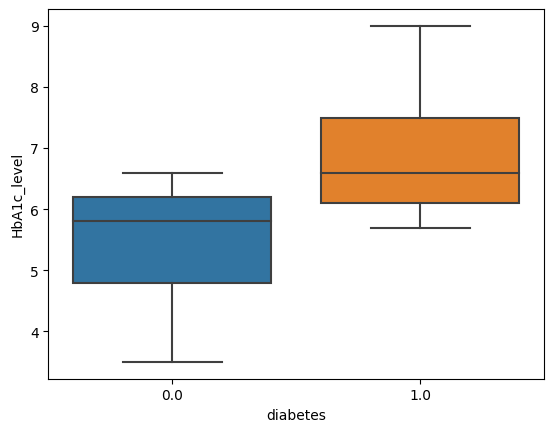

In [ ]:
sns.boxplot(x='diabetes',y='HbA1c_level',data=data)
plt.show()

### Tratamiento de los datos categóricos

In [ ]:
def perform_one_hot_encoding(df, column_name):
    dummies = pd.get_dummies(df[column_name], prefix=column_name)

    df = pd.concat([df.drop(column_name, axis=1), dummies], axis=1)

    return df

data = perform_one_hot_encoding(data, 'gender')

data = perform_one_hot_encoding(data, 'smoking_history')

In [ ]:
data.head()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,smoking_history_current,smoking_history_non-smoker,smoking_history_past_smoker
0,80.0,0.0,1.0,25.19,6.6,140.0,0.0,1,0,0,1,0
1,54.0,0.0,0.0,27.32,6.6,80.0,0.0,1,0,0,1,0
2,28.0,0.0,0.0,27.32,5.7,158.0,0.0,0,1,0,1,0
3,36.0,0.0,0.0,23.45,5.0,155.0,0.0,1,0,1,0,0
4,76.0,1.0,1.0,20.14,4.8,155.0,0.0,0,1,1,0,0


### Pruebas de Correlación

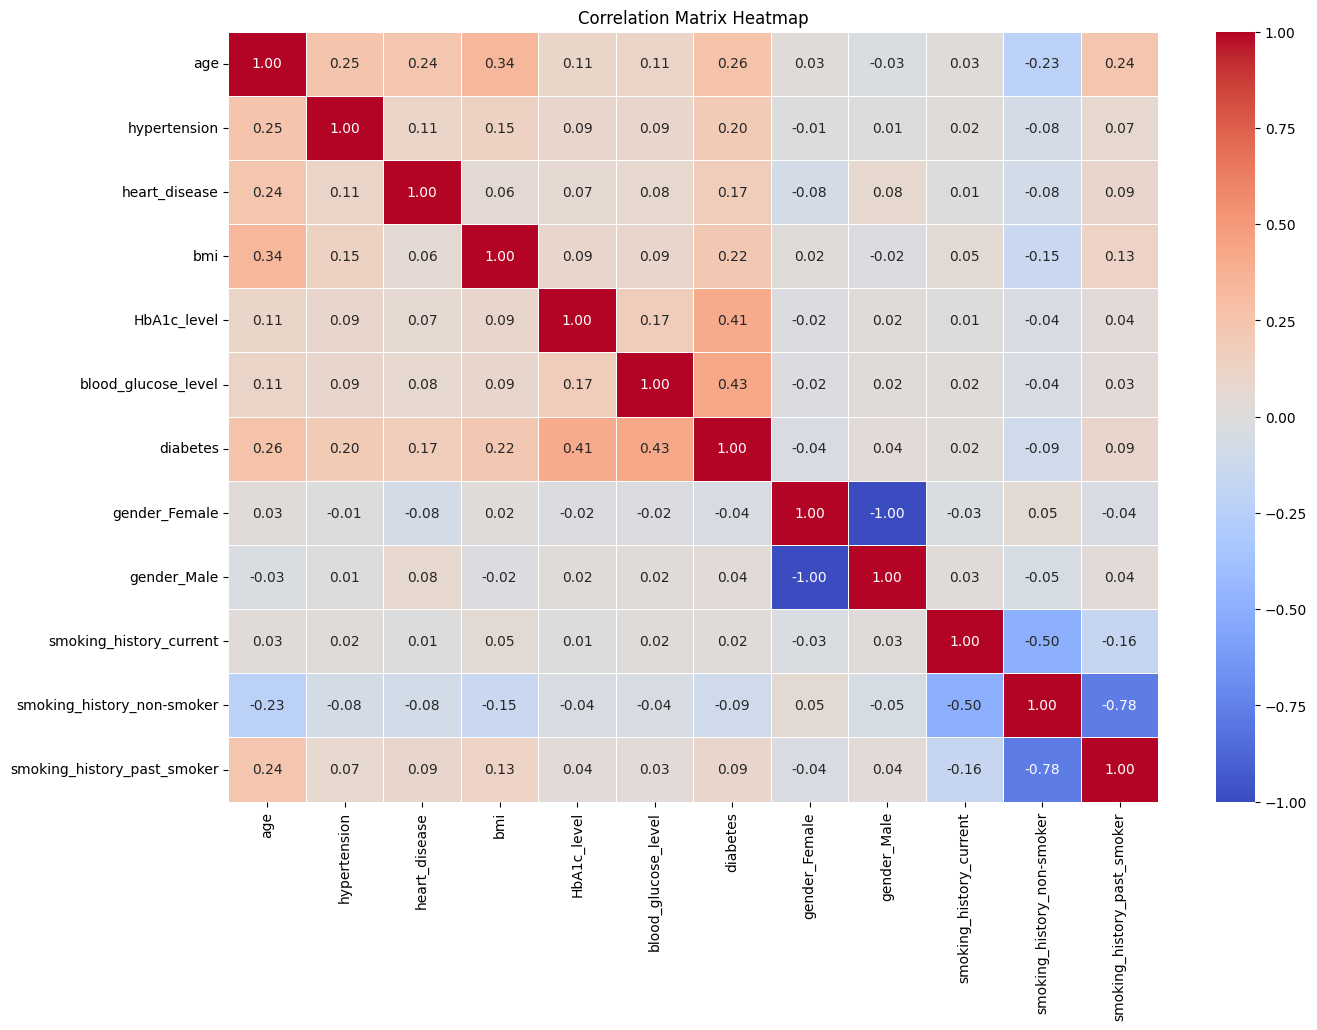

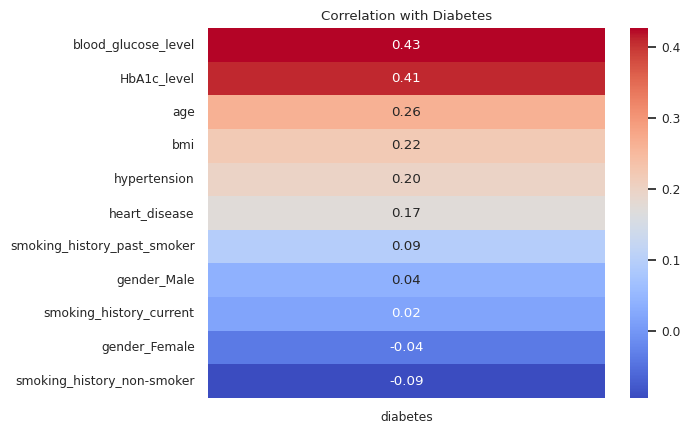

In [ ]:
correlation_matrix = data.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


corr = data.corr()
target_corr = corr['diabetes'].drop('diabetes')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Diabetes')
plt.show()

# Entrenamiento de Modelos

## Balanceo de Datos

In [ ]:
X = data.drop('diabetes', axis=1)
y = data['diabetes']

### Smote

In [ ]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)
print(Counter(y))
print(Counter(y_smote))

Counter({0.0: 49028, 1.0: 4756})
Counter({0.0: 49028, 1.0: 49028})


### Oversampling

In [ ]:
oversample = RandomOverSampler()
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y))
print(Counter(y_over))

Counter({0.0: 49028, 1.0: 4756})
Counter({0.0: 49028, 1.0: 49028})


### Undersampling

In [ ]:
undersample = RandomUnderSampler()
X_under, y_under = undersample.fit_resample(X, y)
print(Counter(y))
print(Counter(y_under))

Counter({0.0: 49028, 1.0: 4756})
Counter({0.0: 4756, 1.0: 4756})


### Partición

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 2023)
X_train_S, X_test_S, y_train_S, y_test_S = train_test_split(X_smote, y_smote, test_size = 0.20, random_state = 2023)
X_train_O, X_test_O, y_train_O, y_test_O = train_test_split(X_over, y_over, test_size = 0.20, random_state = 2023)
X_train_U, X_test_U, y_train_U, y_test_U = train_test_split(X_under, y_under, test_size = 0.20, random_state = 2023)

In [ ]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)
#Smote
X_train_S = StandardScaler().fit_transform(X_train_S)
X_test_S = StandardScaler().fit_transform(X_test_S)
#Over
X_train_O = StandardScaler().fit_transform(X_train_O)
X_test_O = StandardScaler().fit_transform(X_test_O)
#Under
X_train_U = StandardScaler().fit_transform(X_train_U)
X_test_U = StandardScaler().fit_transform(X_test_U)

## XGBOOST

In [ ]:
from xgboost import XGBClassifier

In [ ]:
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500, 600, 700],
    'max_depth': [2, 3, 4, 5]
}

In [ ]:
xgb_imbal = GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=1,cv=5)
xgb_imbal.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             verbose=1)

In [ ]:
xgb_under = GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=1,cv=5)
xgb_under.fit(X_train_U,y_train_U)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             verbose=1)

In [ ]:
xgb_over = GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=1,cv=5)
xgb_over.fit(X_train_O,y_train_O)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             verbose=1)

In [ ]:
xgb_smote = GridSearchCV(XGBClassifier(),param_grid,refit=True,verbose=1,cv=5)
xgb_smote.fit(X_train_S,y_train_S)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...n=None,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'n_estimators': [100, 200, 300, 400, 500, 600, 700]},
             verbose=1)

In [ ]:
print(xgb_imbal.best_estimator_)
print(xgb_under.best_estimator_)
print(xgb_over.best_estimator_)
print(xgb_smote.best_estimator_)

In [ ]:
#XGboost
xgb_best_imbal = XGBClassifier(max_depth=2, n_estimators=100).fit(X_train, y_train)
xgb_best_U = XGBClassifier(max_depth=2, n_estimators=100).fit(X_train, y_train)
xgb_best_O = XGBClassifier(max_depth=5, n_estimators=700).fit(X_train, y_train)
xgb_best_S = XGBClassifier(max_depth=4, n_estimators=400).fit(X_train, y_train)

In [ ]:
# Evaluación

In [ ]:
y_pred_xgb_imbal = xgb_best_imbal.predict(X_test)
y_pred_xgb_U = xgb_best_U.predict(X_test_U)
y_pred_xgb_O = xgb_best_O.predict(X_test_O)
y_pred_xgb_S = xgb_best_S.predict(X_test_S)

In [ ]:
sensibilidad_xgb_imbal = recall_score(y_test, y_pred_xgb_imbal)
sensibilidad_xgb_under = recall_score(y_test_U, y_pred_xgb_U)
sensibilidad_xgb_over = recall_score(y_test_O, y_pred_xgb_O)
sensibilidad_xgb_smote = recall_score(y_test_S, y_pred_xgb_S)

In [ ]:
y_pred_prob_xgb_imbal = xgb_best_imbal.predict_proba(X_test)
y_pred_prob_xgb_U = xgb_best_U.predict_proba(X_test_U)
y_pred_prob_xgb_O = xgb_best_O.predict_proba(X_test_O)
y_pred_prob_xgb_S = xgb_best_S.predict_proba(X_test_S)

In [ ]:
false_positive_rate_xgb_imbal, true_positive_rate_xgb_imbal, thresholds_xgb_imbal = roc_curve(y_test, y_pred_prob_xgb_imbal[:,1])
false_positive_rate_xgb_U, true_positive_rate_xgb_U, thresholds_xgb_U = roc_curve(y_test_U, y_pred_prob_xgb_U[:,1])
false_positive_rate_xgb_O, true_positive_rate_xgb_O, thresholds_xgb_O= roc_curve(y_test_O, y_pred_prob_xgb_O[:,1])
false_positive_rate_xgb_S, true_positive_rate_xgb_S, thresholds_xgb_S = roc_curve(y_test_S, y_pred_prob_xgb_S[:,1])

In [ ]:
roc_auc_xgb_imbal = auc(false_positive_rate_xgb_imbal, true_positive_rate_xgb_imbal)
roc_auc_xgb_U = auc(false_positive_rate_xgb_U, true_positive_rate_xgb_U)
roc_auc_xgb_O = auc(false_positive_rate_xgb_O, true_positive_rate_xgb_O)
roc_auc_xgb_S = auc(false_positive_rate_xgb_S, true_positive_rate_xgb_S)

In [ ]:
gini_xgb_imbal = 2*roc_auc_xgb_imbal -1
gini_xgb_U = 2*roc_auc_xgb_U -1
gini_xgb_O = 2*roc_auc_xgb_O -1
gini_xgb_S = 2*roc_auc_xgb_S -1

## LIGHT GBM

In [ ]:
import lightgbm as lgb

In [ ]:
param_grid = {
    'boosting_type': ['gbdt', 'dart'],
    'num_leaves': [20, 30],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200, 300],
    'force_row_wise': [True]
}

In [ ]:
LGBM_imbal = GridSearchCV(lgb.LGBMClassifier(),param_grid,refit=True, verbose=1,cv=5)
LGBM_under = GridSearchCV(lgb.LGBMClassifier(),param_grid,refit=True, verbose=1,cv=5)
LGBM_over = GridSearchCV(lgb.LGBMClassifier(),param_grid,refit=True, verbose=1,cv=5)
LGBM_smote = GridSearchCV(lgb.LGBMClassifier(),param_grid,refit=True, verbose=1,cv=5)

In [ ]:
LGBM_imbal.fit(X_train,y_train)

In [ ]:
LGBM_under.fit(X_train_U,y_train_U)

In [ ]:
LGBM_over.fit(X_train_O,y_train_O)

In [ ]:
LGBM_smote.fit(X_train_S,y_train_S)

In [ ]:
print(LGBM_imbal.best_estimator_)
print(LGBM_under.best_estimator_)
print(LGBM_over.best_estimator_)
print(LGBM_smote.best_estimator_)

LGBMClassifier(boosting_type='dart', force_row_wise=True, n_estimators=200,
               num_leaves=30)
LGBMClassifier(boosting_type='dart', force_row_wise=True, learning_rate=0.05,
               n_estimators=300, num_leaves=30)
LGBMClassifier(force_row_wise=True, n_estimators=300, num_leaves=30)
LGBMClassifier(force_row_wise=True, n_estimators=300, num_leaves=30)


In [ ]:
lgbm_best_imbal = lgb.LGBMClassifier(boosting_type='dart', learning_rate=0.05, n_estimators=200,
               num_leaves=30).fit(X_train, y_train)
lgbm_best_U = lgb.LGBMClassifier(boosting_type='dart', learning_rate=0.05, n_estimators=300,
               num_leaves=30).fit(X_train_U, y_train_U)
lgbm_best_O = lgb.LGBMClassifier(boosting_type='dart',n_estimators=300,
               num_leaves=30).fit(X_train_O, y_train_O)
lgbm_best_S = lgb.LGBMClassifier(boosting_type='dart', learning_rate=0.05, n_estimators=300,
               num_leaves=30).fit(X_train_S, y_train_S)

[LightGBM] [Info] Number of positive: 3812, number of negative: 39215
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003680 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 417
[LightGBM] [Info] Number of data points in the train set: 43027, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.088596 -> initscore=-2.330905
[LightGBM] [Info] Start training from score -2.330905
[LightGBM] [Info] Number of positive: 3785, number of negative: 3824
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000808 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 412
[LightGBM] [Info] Number of data points in the train set: 7609, number of used features: 11
[LightGBM] [Info] [binar

In [ ]:
# Evaluación

In [ ]:
y_pred_lgbm_imbal = lgbm_best_imbal.predict(X_test)
y_pred_lgbm_U = lgbm_best_U.predict(X_test_U)
y_pred_lgbm_O = lgbm_best_O.predict(X_test_O)
y_pred_lgbm_S = lgbm_best_S.predict(X_test_S)

In [ ]:
sensibilidad_lgbm_imbal = recall_score(y_test, y_pred_lgbm_imbal)
sensibilidad_lgbm_under = recall_score(y_test_U, y_pred_lgbm_U)
sensibilidad_lgbm_over = recall_score(y_test_O, y_pred_lgbm_O)
sensibilidad_lgbm_smote = recall_score(y_test_S, y_pred_lgbm_S)

In [ ]:
y_pred_prob_lgbm_imbal = lgbm_best_imbal.predict_proba(X_test)
y_pred_prob_lgbm_U = lgbm_best_U.predict_proba(X_test_U)
y_pred_prob_lgbm_O = lgbm_best_O.predict_proba(X_test_O)
y_pred_prob_lgbm_S = lgbm_best_S.predict_proba(X_test_S)

In [ ]:
false_positive_rate_lgbm_imbal, true_positive_rate_lgbm_imbal, thresholds_lgbm_imbal = roc_curve(y_test, y_pred_prob_lgbm_imbal[:,1])
false_positive_rate_lgbm_U, true_positive_rate_lgbm_U, thresholds_lgbm_U = roc_curve(y_test_U, y_pred_prob_lgbm_U[:,1])
false_positive_rate_lgbm_O, true_positive_rate_lgbm_O, thresholds_lgbm_O= roc_curve(y_test_O, y_pred_prob_lgbm_O[:,1])
false_positive_rate_lgbm_S, true_positive_rate_lgbm_S, thresholds_lgbm_S = roc_curve(y_test_S, y_pred_prob_lgbm_S[:,1])

In [ ]:
roc_auc_lgbm_imbal = auc(false_positive_rate_lgbm_imbal, true_positive_rate_lgbm_imbal)
roc_auc_lgbm_U = auc(false_positive_rate_lgbm_U, true_positive_rate_lgbm_U)
roc_auc_lgbm_O = auc(false_positive_rate_lgbm_O, true_positive_rate_lgbm_O)
roc_auc_lgbm_S = auc(false_positive_rate_lgbm_S, true_positive_rate_lgbm_S)

In [ ]:
gini_lgbm_imbal = 2*roc_auc_lgbm_imbal -1
gini_lgbm_U = 2*roc_auc_lgbm_U -1
gini_lgbm_O = 2*roc_auc_lgbm_O -1
gini_lgbm_S = 2*roc_auc_lgbm_S -1

## CatBoost

In [ ]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 9.9 MB/s eta 0:00:00


In [ ]:
from catboost import CatBoostClassifier

In [ ]:
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [50, 100, 200],
}

In [ ]:
CB_imbal = GridSearchCV(CatBoostClassifier(),param_grid,refit=True,verbose=1,cv=5)
CB_under = GridSearchCV(CatBoostClassifier(),param_grid,refit=True,verbose=1,cv=5)
CB_over = GridSearchCV(CatBoostClassifier(),param_grid,refit=True,verbose=1,cv=5)
CB_smote = GridSearchCV(CatBoostClassifier(),param_grid,refit=True,verbose=1,cv=5)

In [ ]:
CB_imbal.fit(X_train,y_train)

In [ ]:
CB_under.fit(X_train_U,y_train_U)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6862757	total: 11.8ms	remaining: 1.16s
1:	learn: 0.6794876	total: 28.7ms	remaining: 1.41s
2:	learn: 0.6730565	total: 39.8ms	remaining: 1.29s
3:	learn: 0.6666696	total: 53.4ms	remaining: 1.28s
4:	learn: 0.6602695	total: 72.4ms	remaining: 1.38s
5:	learn: 0.6541045	total: 89.9ms	remaining: 1.41s
6:	learn: 0.6481224	total: 101ms	remaining: 1.33s
7:	learn: 0.6420525	total: 114ms	remaining: 1.31s
8:	learn: 0.6366432	total: 125ms	remaining: 1.27s
9:	learn: 0.6307559	total: 132ms	remaining: 1.18s
10:	learn: 0.6251032	total: 155ms	remaining: 1.25s
11:	learn: 0.6194182	total: 167ms	remaining: 1.22s
12:	learn: 0.6138830	total: 174ms	remaining: 1.17s
13:	learn: 0.6085800	total: 187ms	remaining: 1.15s
14:	learn: 0.6034688	total: 208ms	remaining: 1.18s
15:	learn: 0.5981713	total: 226ms	remaining: 1.18s
16:	learn: 0.5930892	total: 236ms	remaining: 1.15s
17:	learn: 0.5881091	total: 245ms	remaining: 1.12s
18:	learn: 0.5831667	total: 263ms	r

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ce6cb16bd60>,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
CB_over.fit(X_train_O,y_train_O)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6859777	total: 96.9ms	remaining: 9.59s
1:	learn: 0.6790547	total: 165ms	remaining: 8.08s
2:	learn: 0.6722204	total: 224ms	remaining: 7.25s
3:	learn: 0.6654266	total: 291ms	remaining: 6.99s
4:	learn: 0.6588223	total: 348ms	remaining: 6.62s
5:	learn: 0.6522761	total: 408ms	remaining: 6.39s
6:	learn: 0.6458841	total: 470ms	remaining: 6.24s
7:	learn: 0.6396208	total: 538ms	remaining: 6.19s
8:	learn: 0.6334648	total: 612ms	remaining: 6.19s
9:	learn: 0.6274449	total: 675ms	remaining: 6.07s
10:	learn: 0.6215110	total: 740ms	remaining: 5.99s
11:	learn: 0.6156814	total: 795ms	remaining: 5.83s
12:	learn: 0.6099366	total: 879ms	remaining: 5.88s
13:	learn: 0.6043361	total: 967ms	remaining: 5.94s
14:	learn: 0.5988309	total: 1.03s	remaining: 5.86s
15:	learn: 0.5933768	total: 1.08s	remaining: 5.66s
16:	learn: 0.5880341	total: 1.1s	remaining: 5.36s
17:	learn: 0.5828954	total: 1.14s	remaining: 5.18s
18:	learn: 0.5777209	total: 1.17s	remaini

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ce6cb169f90>,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
CB_smote.fit(X_train_S,y_train_S)

Streaming output truncated to the last 5000 lines.
0:	learn: 0.6859435	total: 13.5ms	remaining: 1.33s
1:	learn: 0.6789282	total: 29ms	remaining: 1.42s
2:	learn: 0.6720312	total: 41.7ms	remaining: 1.35s
3:	learn: 0.6652913	total: 54.4ms	remaining: 1.3s
4:	learn: 0.6585754	total: 69.2ms	remaining: 1.31s
5:	learn: 0.6519474	total: 82.1ms	remaining: 1.29s
6:	learn: 0.6455025	total: 94.8ms	remaining: 1.26s
7:	learn: 0.6391511	total: 107ms	remaining: 1.24s
8:	learn: 0.6329258	total: 133ms	remaining: 1.34s
9:	learn: 0.6268038	total: 146ms	remaining: 1.31s
10:	learn: 0.6207694	total: 160ms	remaining: 1.3s
11:	learn: 0.6148470	total: 175ms	remaining: 1.28s
12:	learn: 0.6090170	total: 187ms	remaining: 1.25s
13:	learn: 0.6032942	total: 200ms	remaining: 1.23s
14:	learn: 0.5976604	total: 218ms	remaining: 1.23s
15:	learn: 0.5921616	total: 237ms	remaining: 1.25s
16:	learn: 0.5867236	total: 252ms	remaining: 1.23s
17:	learn: 0.5814594	total: 264ms	remaining: 1.2s
18:	learn: 0.5761994	total: 277ms	remai

GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7ce6cb16b5b0>,
             param_grid={'learning_rate': [0.01, 0.05, 0.1],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [ ]:
print(CB_imbal.best_params_)
print(CB_under.best_params_)
print(CB_over.best_params_)
print(CB_smote.best_params_)

{'learning_rate': 0.05, 'n_estimators': 200}
{'learning_rate': 0.1, 'n_estimators': 100}
{'learning_rate': 0.1, 'n_estimators': 200}
{'learning_rate': 0.1, 'n_estimators': 200}


In [ ]:
cb_best_imbal = CatBoostClassifier(learning_rate=0.05, n_estimators=200).fit(X_train, y_train)
cb_best_U = CatBoostClassifier(learning_rate=0.1, n_estimators=100).fit(X_train_U, y_train_U)
cb_best_O = CatBoostClassifier(learning_rate=0.1, n_estimators=200).fit(X_train_O, y_train_O)
cb_best_S = CatBoostClassifier(learning_rate=0.1, n_estimators=200).fit(X_train_S, y_train_S)

0:	learn: 0.5902415	total: 60.4ms	remaining: 12s
1:	learn: 0.5160869	total: 74.6ms	remaining: 7.38s
2:	learn: 0.4510454	total: 88.4ms	remaining: 5.8s
3:	learn: 0.3924443	total: 98ms	remaining: 4.8s
4:	learn: 0.3376602	total: 107ms	remaining: 4.18s
5:	learn: 0.3064949	total: 116ms	remaining: 3.76s
6:	learn: 0.2803988	total: 126ms	remaining: 3.48s
7:	learn: 0.2531862	total: 138ms	remaining: 3.31s
8:	learn: 0.2296389	total: 155ms	remaining: 3.28s
9:	learn: 0.2111669	total: 164ms	remaining: 3.12s
10:	learn: 0.1964301	total: 174ms	remaining: 2.99s
11:	learn: 0.1797775	total: 184ms	remaining: 2.88s
12:	learn: 0.1633850	total: 194ms	remaining: 2.79s
13:	learn: 0.1516286	total: 204ms	remaining: 2.72s
14:	learn: 0.1410525	total: 215ms	remaining: 2.65s
15:	learn: 0.1317558	total: 225ms	remaining: 2.58s
16:	learn: 0.1278123	total: 235ms	remaining: 2.53s
17:	learn: 0.1229298	total: 245ms	remaining: 2.47s
18:	learn: 0.1181643	total: 254ms	remaining: 2.42s
19:	learn: 0.1144754	total: 269ms	remaining

In [ ]:
# Evaluación

In [ ]:
y_pred_cb_imbal = cb_best_imbal.predict(X_test)
y_pred_cb_U = cb_best_U.predict(X_test_U)
y_pred_cb_O = cb_best_O.predict(X_test_O)
y_pred_cb_S = cb_best_S.predict(X_test_S)

In [ ]:
sensibilidad_cb_imbal = recall_score(y_test, y_pred_cb_imbal)
sensibilidad_cb_under = recall_score(y_test_U, y_pred_cb_U)
sensibilidad_cb_over = recall_score(y_test_O, y_pred_cb_O)
sensibilidad_cb_smote = recall_score(y_test_S, y_pred_cb_S)

In [ ]:
y_pred_prob_cb_imbal = cb_best_imbal.predict_proba(X_test)
y_pred_prob_cb_U = cb_best_U.predict_proba(X_test_U)
y_pred_prob_cb_O = cb_best_O.predict_proba(X_test_O)
y_pred_prob_cb_S = cb_best_S.predict_proba(X_test_S)

In [ ]:
false_positive_rate_cb_imbal, true_positive_rate_cb_imbal, thresholds_cb_imbal = roc_curve(y_test, y_pred_prob_cb_imbal[:,1])
false_positive_rate_cb_U, true_positive_rate_cb_U, thresholds_cb_U = roc_curve(y_test_U, y_pred_prob_cb_U[:,1])
false_positive_rate_cb_O, true_positive_rate_cb_O, thresholds_cb_O= roc_curve(y_test_O, y_pred_prob_cb_O[:,1])
false_positive_rate_cb_S, true_positive_rate_cb_S, thresholds_cb_S = roc_curve(y_test_S, y_pred_prob_cb_S[:,1])

In [ ]:
roc_auc_cb_imbal = auc(false_positive_rate_cb_imbal, true_positive_rate_cb_imbal)
roc_auc_cb_U = auc(false_positive_rate_cb_U, true_positive_rate_cb_U)
roc_auc_cb_O = auc(false_positive_rate_cb_O, true_positive_rate_cb_O)
roc_auc_cb_S = auc(false_positive_rate_cb_S, true_positive_rate_cb_S)

In [ ]:
gini_cb_imbal = 2*roc_auc_cb_imbal -1
gini_cb_U = 2*roc_auc_cb_U -1
gini_cb_O = 2*roc_auc_cb_O -1
gini_cb_S = 2*roc_auc_cb_S -1

# Resultados

## Tabla

In [ ]:
resultados = pd.DataFrame(columns=['Modelos', 'Sensibilidad', 'AUC', 'GINNI'])

In [ ]:
resultados['Modelos'] = ['XGBOOST IMBAL', 'XGBOOST UNDER', 'XGBOOST OVER', 'XGBOOST SMOTE',
                        'LIGHTGBM IMBAL', 'LIGHTGBM UNDER', 'LIGHTGBM OVER', 'LIGHTGBM SMOTE',
                        'CatBoost IMBAL', 'CatBoost UNDER', 'CatBoost OVER', 'CatBoost SMOTE']

In [ ]:
resultados['Sensibilidad'] = [sensibilidad_xgb_imbal, sensibilidad_xgb_under, sensibilidad_xgb_over, sensibilidad_xgb_smote,
                              sensibilidad_lgbm_imbal, sensibilidad_lgbm_under, sensibilidad_lgbm_over, sensibilidad_lgbm_smote,
                              sensibilidad_cb_imbal, sensibilidad_cb_under, sensibilidad_cb_over, sensibilidad_cb_smote]

In [ ]:
resultados['AUC'] = [roc_auc_xgb_imbal, roc_auc_xgb_U, roc_auc_xgb_O, roc_auc_xgb_S,
                     roc_auc_lgbm_imbal, roc_auc_lgbm_U, roc_auc_lgbm_O, roc_auc_lgbm_S,
                     roc_auc_cb_imbal, roc_auc_cb_U, roc_auc_cb_O, roc_auc_cb_S]

In [ ]:
resultados['GINNI'] = [gini_xgb_imbal, gini_xgb_U, gini_xgb_O, gini_xgb_S,
                       gini_lgbm_imbal, gini_lgbm_U, gini_lgbm_O, gini_lgbm_S,
                       gini_cb_imbal, gini_cb_U, gini_cb_O, gini_cb_S]

In [ ]:
resultados

,Modelos,Sensibilidad,AUC,GINNI
0,XGBOOST IMBAL,0.637712,0.959784,0.919567
1,XGBOOST UNDER,0.332647,0.873203,0.746405
2,XGBOOST OVER,0.324004,0.853429,0.706858
3,XGBOOST SMOTE,0.270889,0.865509,0.731019
4,LIGHTGBM IMBAL,0.687500,0.978812,0.957624
5,LIGHTGBM UNDER,0.921730,0.978316,0.956633
6,LIGHTGBM OVER,0.958325,0.986851,0.973702
7,LIGHTGBM SMOTE,0.998570,0.985541,0.971081
8,CatBoost IMBAL,0.693856,0.980086,0.960173
9,CatBoost UNDER,0.923790,0.980030,0.960061


## Gráficas

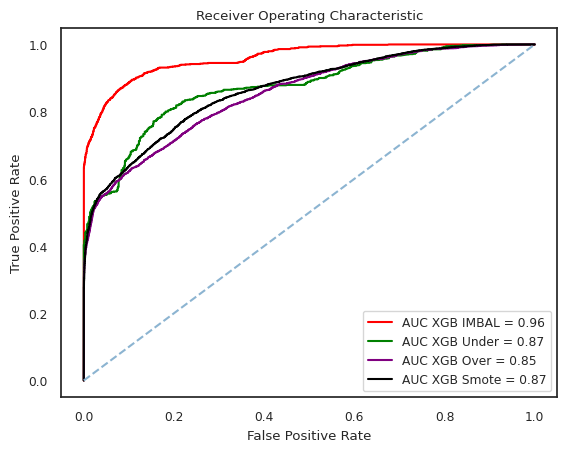

In [ ]:
# XGBOOST
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_xgb_imbal,true_positive_rate_xgb_imbal, color='red',label = 'AUC XGB IMBAL = %0.2f' % roc_auc_xgb_imbal)
plt.plot(false_positive_rate_xgb_U,true_positive_rate_xgb_U, color='green',label = 'AUC XGB Under = %0.2f' % roc_auc_xgb_U)
plt.plot(false_positive_rate_xgb_O,true_positive_rate_xgb_O, color='purple',label = 'AUC XGB Over = %0.2f' % roc_auc_xgb_O)
plt.plot(false_positive_rate_xgb_S,true_positive_rate_xgb_S, color='black',label = 'AUC XGB Smote = %0.2f' % roc_auc_xgb_S)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

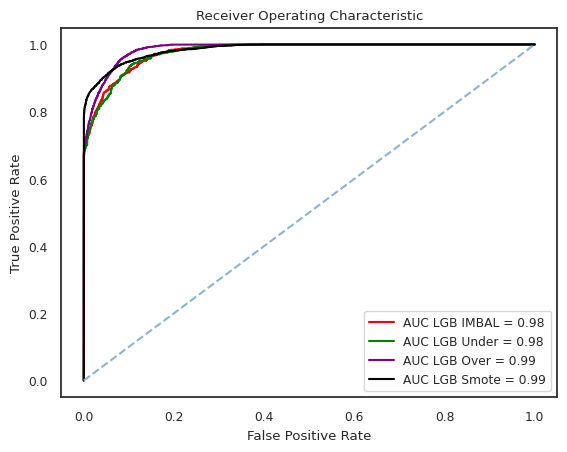

In [ ]:
# LIGHT GBM
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_lgbm_imbal,true_positive_rate_lgbm_imbal, color='red',label = 'AUC LGB IMBAL = %0.2f' % roc_auc_lgbm_imbal)
plt.plot(false_positive_rate_lgbm_U, true_positive_rate_lgbm_U, color='green',label = 'AUC LGB Under = %0.2f' % roc_auc_lgbm_U)
plt.plot(false_positive_rate_lgbm_O,true_positive_rate_lgbm_O, color='purple',label = 'AUC LGB Over = %0.2f' % roc_auc_lgbm_O)
plt.plot(false_positive_rate_lgbm_S,true_positive_rate_lgbm_S, color='black',label = 'AUC LGB Smote = %0.2f' % roc_auc_lgbm_S)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

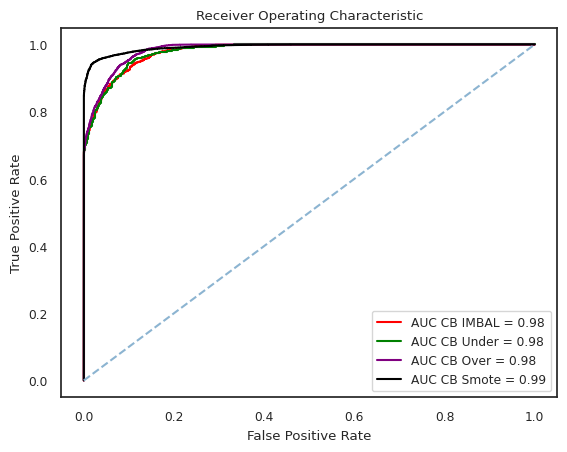

In [ ]:
# Cat Boost
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_cb_imbal,true_positive_rate_cb_imbal, color='red',label = 'AUC CB IMBAL = %0.2f' % roc_auc_cb_imbal)
plt.plot(false_positive_rate_cb_U, true_positive_rate_cb_U, color='green',label = 'AUC CB Under = %0.2f' % roc_auc_cb_U)
plt.plot(false_positive_rate_cb_O,true_positive_rate_cb_O, color='purple',label = 'AUC CB Over = %0.2f' % roc_auc_cb_O)
plt.plot(false_positive_rate_cb_S,true_positive_rate_cb_S, color='black',label = 'AUC CB Smote = %0.2f' % roc_auc_cb_S)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

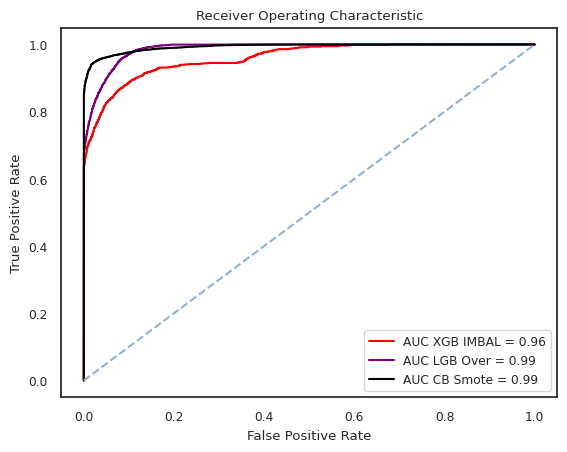

In [ ]:
# Mejor de los Tres Modelos
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate_xgb_imbal,true_positive_rate_xgb_imbal, color='red',label = 'AUC XGB IMBAL = %0.2f' % roc_auc_xgb_imbal)
plt.plot(false_positive_rate_lgbm_O,true_positive_rate_lgbm_O, color='purple',label = 'AUC LGB Over = %0.2f' % roc_auc_lgbm_O)
plt.plot(false_positive_rate_cb_S,true_positive_rate_cb_S, color='black',label = 'AUC CB Smote = %0.2f' % roc_auc_cb_S)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()